In [ ]:
# Установка необходимых библиотек
!pip install nltk wordcloud transformers matplotlib
!python -m nltk.downloader punkt stopwords

# Импорт библиотек
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline

# Загружаем стоп-слова для русского языка
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Набор отзывов (можно заменить на свои)
reviews = [
    "Отличный продукт, очень доволен покупкой, рекомендую всем!",
    "Ужасный сервис, доставка опоздала, больше не закажу.",
    "Нормальный товар, но цена могла бы быть ниже.",
    "Качество супер, быстро доставили, спасибо магазину!",
    "Плохое обслуживание, товар пришел бракованный."
]

# Функция предобработки текста
def preprocess_text(text):
    # Убираем знаки препинания и приводим к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Разбиваем на слова
    tokens = word_tokenize(text)
    # Убираем стоп-слова
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Обработка всех отзывов
all_words = []
for review in reviews:
    words = preprocess_text(review)
    all_words.extend(words)

# Подсчёт частоты слов
word_freq = nltk.FreqDist(all_words)

# Вывод 10 самых частых слов
print("10 самых частых слов:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Визуализация облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из отзывов')
plt.show()

# Базовый анализ тональности
sentiment_analyzer = pipeline('sentiment-analysis', model='cointegrated/rubert-tiny-sentiment-balanced')
sentiments = [sentiment_analyzer(review)[0] for review in reviews]

# Вывод тональности для каждого отзыва
print("\nАнализ тональности:")
for i, (review, sentiment) in enumerate(zip(reviews, sentiments)):
    print(f"Отзыв {i+1}: {review}")
    print(f"Тональность: {sentiment['label']} (уверенность: {sentiment['score']:.2f})\n")

In [1]:
# Установка необходимых библиотек
!pip install nltk wordcloud transformers matplotlib
!python -m nltk.downloader punkt stopwords

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Импорт библиотек
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline

In [3]:
# Загружаем стоп-слова для русского языка
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Набор отзывов (можно заменить на свои)
reviews = [
    "Отличный продукт, очень доволен покупкой, рекомендую всем!",
    "Ужасный сервис, доставка опоздала, больше не закажу.",
    "Нормальный товар, но цена могла бы быть ниже.",
    "Качество супер, быстро доставили, спасибо магазину!",
    "Плохое обслуживание, товар пришел бракованный."
]


In [5]:
# Функция предобработки текста
def preprocess_text(text):
    # Убираем знаки препинания и приводим к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Разбиваем на слова
    tokens = word_tokenize(text)
    # Убираем стоп-слова
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


In [7]:
# Загружаем стоп-слова и токенизатор для русского языка
nltk.download('punkt')  # Для обратной совместимости
nltk.download('punkt_tab')  # Новый ресурс для токенизации
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Обработка всех отзывов
all_words = []
for review in reviews:
    words = preprocess_text(review)
    all_words.extend(words)

In [9]:
# Подсчёт частоты слов
word_freq = nltk.FreqDist(all_words)

In [10]:
# Вывод 10 самых частых слов
print("10 самых частых слов:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

10 самых частых слов:
товар: 2
отличный: 1
продукт: 1
очень: 1
доволен: 1
покупкой: 1
рекомендую: 1
всем: 1
ужасный: 1
сервис: 1


In [11]:
# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

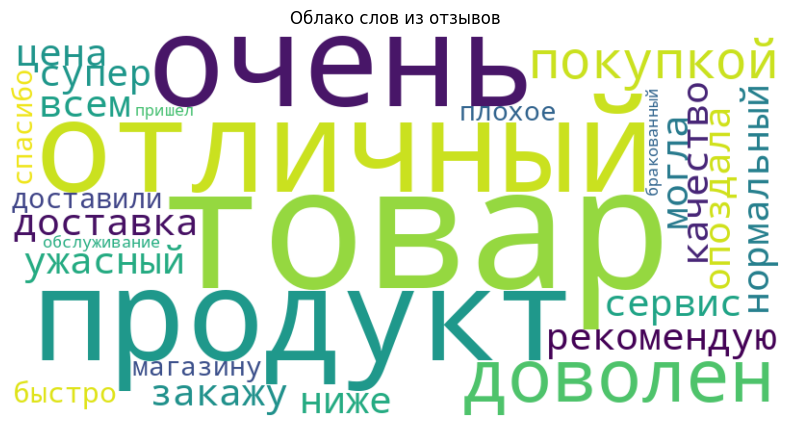

In [12]:
# Визуализация облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из отзывов')
plt.show()

In [13]:
# Базовый анализ тональности
sentiment_analyzer = pipeline('sentiment-analysis', model='cointegrated/rubert-tiny-sentiment-balanced')
sentiments = [sentiment_analyzer(review)[0] for review in reviews]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/884 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.2M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/377 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [15]:
# Вывод тональности для каждого отзыва
print("\nАнализ тональности:")
for i, (review, sentiment) in enumerate(zip(reviews, sentiments)):
    print(f"Отзыв {i+1}: {review}")
    print(f"Тональность: {sentiment['label']} (уверенность: {sentiment['score']:.2f})\n")



Анализ тональности:
Отзыв 1: Отличный продукт, очень доволен покупкой, рекомендую всем!
Тональность: positive (уверенность: 1.00)

Отзыв 2: Ужасный сервис, доставка опоздала, больше не закажу.
Тональность: negative (уверенность: 0.99)

Отзыв 3: Нормальный товар, но цена могла бы быть ниже.
Тональность: neutral (уверенность: 0.61)

Отзыв 4: Качество супер, быстро доставили, спасибо магазину!
Тональность: positive (уверенность: 1.00)

Отзыв 5: Плохое обслуживание, товар пришел бракованный.
Тональность: negative (уверенность: 0.91)

